In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(1)

# Define the number of rows and columns
num_rows = 15

num_columns = 1

# Create a DataFrame with random data
random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])

print(random_data)

rd = random_data

rd['Column_1'] = (rd['Column_1'] + rd.index)

print(rd)

    Column_1
0   0.417022
1   0.720324
2   0.000114
3   0.302333
4   0.146756
5   0.092339
6   0.186260
7   0.345561
8   0.396767
9   0.538817
10  0.419195
11  0.685220
12  0.204452
13  0.878117
14  0.027388
     Column_1
0    0.417022
1    1.720324
2    2.000114
3    3.302333
4    4.146756
5    5.092339
6    6.186260
7    7.345561
8    8.396767
9    9.538817
10  10.419195
11  11.685220
12  12.204452
13  13.878117
14  14.027388


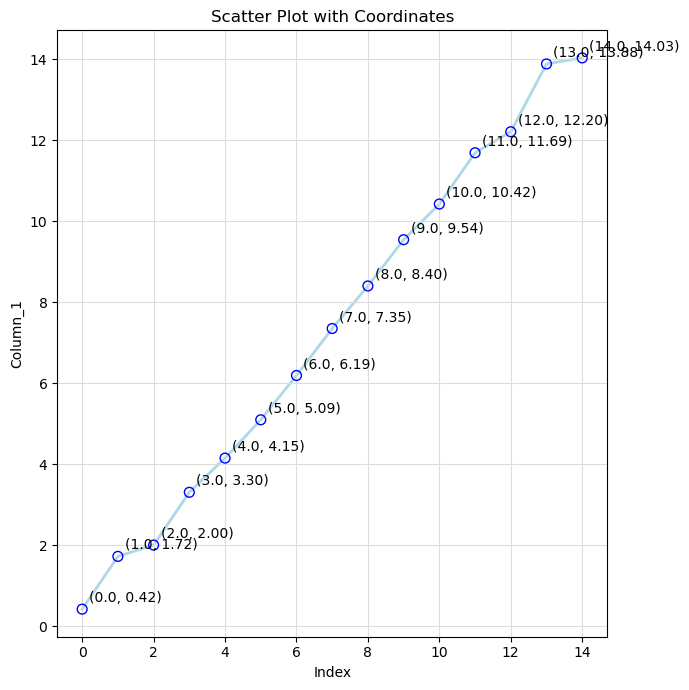

In [3]:
def create_Original_Graph(data_list):

    Color = 'blue'
    lineColor = "lightblue"
    plt.figure(figsize=(7, 7))
    
    plt.plot(rd.index, rd['Column_1'], color=lineColor, linestyle='-', linewidth=2, label='Trend Line', zorder=1)
    
    plt.scatter(rd.index, rd['Column_1'], s=50, zorder=3, facecolors='none', edgecolors=Color)
    # Annotate each point with its coordinates
    for i, txt in enumerate(rd['Column_1']):
        plt.annotate(f'({rd.index[i]:.1f}, {txt:.2f})', 
                     (rd.index[i], txt),
                     xytext=(5, 5),
                     textcoords='offset points')
    
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    
    plt.xlabel('Index')
    plt.ylabel('Column_1')
    plt.title('Scatter Plot with Coordinates')
    plt.tight_layout()

create_Original_Graph(rd)
plt.show()

In [4]:
def find_Sample_Means(sample, data_set):
    n = sample
    
    x_Sample_Sum = 0
    y_Sample_Sum = 0
    
    for row in range(n):
        y_Sample_Sum += data_set['Column_1'][row]
        x_Sample_Sum += row
    
    y_Sample_Mean = y_Sample_Sum / n
    x_Sample_Mean = x_Sample_Sum / n
    
    return x_Sample_Mean, y_Sample_Mean

sample_Means = find_Sample_Means(num_rows, rd)
x_Sample_Mean, y_Sample_Mean = sample_Means
print(f"X Sample Mean: {x_Sample_Mean} \nY Sample Mean: {y_Sample_Mean}")

X Sample Mean: 7.0 
Y Sample Mean: 7.357377624797001


In [5]:
def find_slope(x_mean, y_mean, sample, data_set):
    n = sample
    covariance = 0
    variance = 0

    for row in range(n):
        
        xi = row
        yi = data_set['Column_1'][row]
        
        covariance += (xi - x_mean) * (yi - y_mean)
        
        variance += (xi - x_mean) ** 2

    B1 = covariance / variance

    return B1

B1 = find_slope(x_Sample_Mean, y_Sample_Mean, num_rows, rd)

print(f"'B1', or the Slope: {B1}")

'B1', or the Slope: 1.0096190474102549


In [6]:
def find_intercept(x_mean, y_mean, slope):
    
    B0 = y_mean - (slope * x_mean)

    return B0

B0 = find_intercept(x_Sample_Mean, y_Sample_Mean, B1)

print(f"'B0', or the Y-Intercept: {B0}")

'B0', or the Y-Intercept: 0.2900442929252174


In [7]:
def find_Residual_Sum_of_Squares(intercept, slope, sample, data_set):
    
    RSS = 0
    squared_errors = []
    
    for row in range(sample):
        
        xi = row
        yi = data_set['Column_1'][row]
        
        squared_error = (yi - (intercept+(slope*xi))) ** 2

        RSS += squared_error
        squared_errors.append(squared_error)
        MSE = RSS / sample
    return RSS, MSE, squared_errors

RSS_Result = find_Residual_Sum_of_Squares(B0, B1, num_rows, rd)
RSS, MSE, squared_errors = RSS_Result

print(f"Residiual Sum of Squares: {RSS} \n\nMSE: {MSE} \n\nList of Squared Errors: {squared_errors}")

Residiual Sum of Squares: 0.9332984556137072 

MSE: 0.06221989704091381 

List of Squared Errors: [0.01612333928821345, 0.17695580573304648, 0.0955848602180842, 0.0002745272053439254, 0.03303836681372562, 0.06041809974897719, 0.026081722223601285, 0.00013963907252739004, 0.000886300653117204, 0.026309169067797098, 0.0010863449470586602, 0.08373250021037144, 0.040409286495795685, 0.21439263877625003, 0.15786585515979762]


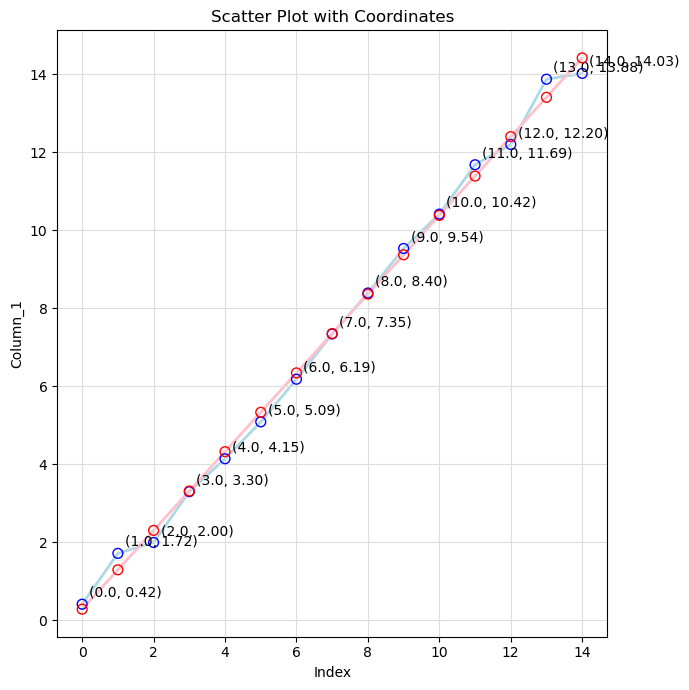

In [8]:
create_Original_Graph(rd)

LR_Color = 'red'
LR_lineColor = 'pink'
x_Linear_Regression = np.array(range(num_rows))
y_Linear_Regression = B0 + B1 * x_Linear_Regression
plt.plot(x_Linear_Regression, y_Linear_Regression, color=LR_lineColor, linestyle='-', linewidth=2, label='Trend Line', zorder=1)
plt.scatter(x_Linear_Regression, y_Linear_Regression, s=50, zorder=3, facecolors='none', edgecolors=LR_Color, label='Regression Line')

plt.show()

In [9]:
def predict_Next_Point(intercept, slope, sample, data_set):
    
    test_X = sample
    test_Y = intercept + slope * test_X

    new_num_rows = sample + 1
    new_rd = pd.DataFrame(np.random.rand(new_num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])
    true_Y = new_rd['Column_1'][new_num_rows-1] + new_num_rows-1
    return test_Y, true_Y, test_X
    
test_Y, true_Y, test_X = predict_Next_Point(B0, B1, num_rows, rd)
print(f"At X = {test_X}, the True Y-Value is: {true_Y} \n\nAt X = {test_X}, the Predicted Y-Value is: {test_Y} \n\nAt X = {test_X} the Residual is {true_Y - test_Y}")

At X = 15, the True Y-Value is: 15.098346833833052 

At X = 15, the Predicted Y-Value is: 15.43433000407904 

At X = 15 the Residual is -0.33598317024598856
